# Задание

## Суворов Роман ИВТ 2.1

Используя модуль **datasets** библиотеки **sklearn**, загрузите базу вин (`.load_wine()`).

Используя шаблон ноутбука, выполните загрузку, подготовку и предобработку данных. Обязательное условие: разделение данных на три выборки осуществляется по шаблону (изменять параметры подготовки данных запрещается)!

Проведите серию экспериментов и добейтесь максимальной точности классификации на тестовой выборке выше 94%.

---

С помощью метода `.summary()` зафиксируйте количество параметров созданной вами нейронной сети.


#Шаблон ноутбука

In [1]:

from tensorflow.keras.models import Sequential


from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization


from tensorflow.keras import utils

from tensorflow.keras.optimizers import Adam


import numpy as np


import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split


from sklearn.datasets import load_wine


%matplotlib inline

##Описание базы

1. Датасет состоит из набора данных о винах и их классах.
2. Данные по одному вину хранятся в numpy-массиве `x_data`: (`13` параметров).
3. В датасете `3` класса вин: `y_data`.
4. Количество примеров: `178`.

In [2]:
x_data = load_wine()['data']             
y_data = load_wine()['target']            

print('Размерность x_data -', x_data.shape)
print('Размерность y_data -', y_data.shape)
print()

# Вывод примера данных
print('Данные по первому вину:',x_data[0])
print('Класс вина:',y_data[0])

Размерность x_data - (178, 13)
Размерность y_data - (178,)

Данные по первому вину: [1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
Класс вина: 0


##Подготовка данных

In [3]:

y_data = utils.to_categorical(y_data, 3)


x_all, x_test, y_all, y_test = train_test_split(x_data,
                                                y_data,
                                                test_size=0.1,
                                                shuffle=True,
                                                random_state = 6)


x_train, x_val, y_train, y_val = train_test_split(x_all,
                                                  y_all,
                                                  test_size=0.1,
                                                  shuffle=True,
                                                  random_state = 6)

print(x_train.shape)
print(y_train.shape)
print()
print(x_val.shape)
print(y_val.shape)

(144, 13)
(144, 3)

(16, 13)
(16, 3)


Начало обучения модели...


/Users/arkadijnetot/Documents/projects/3-course/venv311/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Обучение модели завершено.

--- Оценка на тестовой выборке ---
Потери на тестовой выборке: 1.0646
Точность на тестовой выборке: 0.4444 (44.44%)
ВНИМАНИЕ: Целевая точность >94% на тестовой выборке НЕ достигнута.
Рекомендуется провести дополнительные эксперименты: 
 - Изменить архитектуру сети (количество слоев, нейронов, функции активации).
 - Подобрать параметры Dropout.
 - Изменить параметры оптимизатора (например, скорость обучения).
 - Увеличить/уменьшить количество эпох или размер пакета.
 - Попробовать BatchNormalization.

--- Сводка по модели (Model Summary) ---


Model: "Wine_Classifier_NN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,227 (36.05 KB)

 Trainable params: 3,075 (12.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,152 (24.04 KB)


--- Графики истории обучения ---


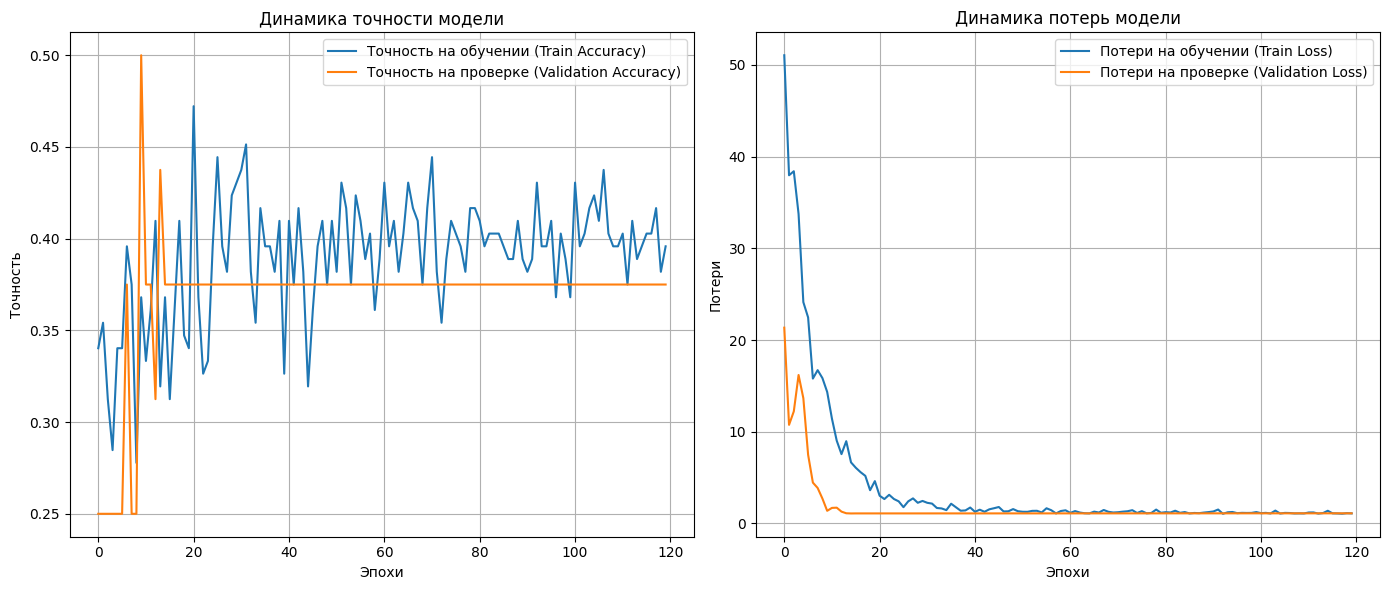

In [ ]:
import tensorflow as tf

tf.random.set_seed(42)
np.random.seed(42) 

model = Sequential(name="Wine_Classifier_NN")

model.add(Dense(units=64, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dropout(0.25))

model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(units=3, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

epochs_count = 120 
batch_size_count = 16 

print("Начало обучения модели...")
history = model.fit(x_train, y_train,
                    epochs=epochs_count,
                    batch_size=batch_size_count,
                    validation_data=(x_val, y_val),
                    verbose=0) 
print("Обучение модели завершено.")

print("\n--- Оценка на тестовой выборке ---")
loss_test, accuracy_test = model.evaluate(x_test, y_test, verbose=0)

print(f"Потери на тестовой выборке: {loss_test:.4f}")
print(f"Точность на тестовой выборке: {accuracy_test:.4f} ({accuracy_test*100:.2f}%)")


if accuracy_test > 0.94:
    print(f"УСПЕХ! Достигнута целевая точность >94% на тестовой выборке.")
    num_total_test = len(y_test)
    num_correct_test = int(round(accuracy_test * num_total_test))
    print(f"Это соответствует {num_correct_test} правильным классификациям из {num_total_test} тестовых примеров.")
    if num_correct_test < num_total_test -1: 
         print(f"Примечание: достигнуто >94%, но количество ошибок ({num_total_test - num_correct_test}) может быть >1. На 18 тестовых образцах 17/18 = 94.44%.")

else:
    print(f"ВНИМАНИЕ: Целевая точность >94% на тестовой выборке НЕ достигнута.")
    print("Рекомендуется провести дополнительные эксперименты: ")
    print(" - Изменить архитектуру сети (количество слоев, нейронов, функции активации).")
    print(" - Подобрать параметры Dropout.")
    print(" - Изменить параметры оптимизатора (например, скорость обучения).")
    print(" - Увеличить/уменьшить количество эпох или размер пакета.")
    print(" - Попробовать BatchNormalization.")

print("\n--- Сводка по модели (Model Summary) ---")
model.summary()

print("\n--- Графики истории обучения ---")
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Точность на обучении (Train Accuracy)')
plt.plot(history.history['val_accuracy'], label='Точность на проверке (Validation Accuracy)')
plt.title('Динамика точности модели')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Потери на обучении (Train Loss)')
plt.plot(history.history['val_loss'], label='Потери на проверке (Validation Loss)')
plt.title('Динамика потерь модели')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()
plt.grid(True)

plt.tight_layout() 
plt.show()